In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import copy



In [2]:
#Extract mean absolute error, R2, and other perfomance metrics for phenoclimate models developed using data from each simulated species while also recording the attributes of each species

def Onset_termination_eval(out_path, model_dict, sample_counts = [1000], taxon_column = 'genus_species', min_samples = 100, sample_type = ''):
    '''
    :param: out_path: path to output results
    :param model_dict:  dictionary listing the aspect of phenological timing (population, individual, etc.) being evaluated vs. predictions, as well as a list including:
            A) a list of model permutations to be included (from models developed using prior R code),
            B) the name of the data column containing the predicted  phenological data to be compared to raw simulations, with the percentile rank replaced by 'YYY'
            C) a list of the percentile ranks to be evaluated (always ['0.1', '0.5', '0.9'] in this study)
            D) a list of the column names to be compared to predicted DOYs
                               
    :param sample_counts: list of the number of specimens used in training the models being evaluated
    :param taxon_column: string consisting of the name of the column used to delineate simulated speices
    :min_samples: int delieating the minimum number of samples required to be evaluated in the model
    :sample_type: string delieating sample type
    
   Generates a series of files recording the MAE, R2, RMSE, and raw error of predictions generated from models of each simulated species trained using the numbers of specimens listed in sample_counts as csvs. 
    '''
    
    mae_frame = 0 
    r2_concat = 'blank'
    mae_concat = 'blank'
    rmse_concat = 'blank'
    
    
    
    for iter_sampleCount in sample_counts:
        
            
    
        for iter_model in model_dict:
            print("__________________________" + iter_model + '____________________________________')
            actual_columns =  model_dict[iter_model][3]
            early_column = actual_columns[0]
            mid_column = actual_columns[1]
            late_column = actual_columns[2]

            
            if type(model_dict[iter_model][0]) == str:
                iter_path = model_dict[iter_model][0]
                iter_data = pd.read_csv(iter_path.replace('XXX', str(iter_sampleCount)))
                print(iter_path)
            
            elif type(model_dict[iter_model][0]) == list:
                
                iter_path = model_dict[iter_model][0]
                iter_data = 'blank'
                
                for iter_iter_path in iter_path:
                
                    iter_iter_data = pd.read_csv(iter_iter_path.replace('XXX', str(iter_sampleCount)))
                    print(iter_iter_path)
                    if "variablesigma" in iter_iter_path:
                        iter_iter_data['sigma'] = -9999.0
                        
                        
                    if "variablesigma" in iter_iter_path:
                        iter_iter_data['sigma'] = -9999.0
                        
                        
                    if "variableduration" in iter_iter_path:
                        iter_iter_data['duration'] = -9999.0
                    
                    if type(iter_data) == str:
                        iter_data = copy.deepcopy(iter_iter_data)
                    else:
                        iter_data = pd.concat([iter_data, iter_iter_data])
            
            pred_column_base = model_dict[iter_model][1]
            quantiles = model_dict[iter_model][2]
            print(quantiles)




            #get sample counts for each species, cull data to species with >- min samples number of observations
            #sample_count = iter_data.groupby(taxon_column).size()
            #sample_count = sample_count.to_frame()
            #sample_count.columns = ['sample_count']
            #iter_data = pd.merge(iter_data, sample_count, on = [taxon_column])
            #iter_data = iter_data[iter_data['sample_count']>= min_samples]


            #remove rows with NAs or infinites
            iter_data.replace([np.inf, -np.inf], np.nan, inplace=True)
            iter_data.dropna(how="any", inplace = True)
            iter_data.reset_index(inplace = True, drop = True)


            if type(mae_frame) == int:
                mae_frame = pd.DataFrame({'genus_species': pd.unique(iter_data[taxon_column])})
                mae_frame.set_index(['genus_species'], drop = True, inplace = True)

                rmse_frame = pd.DataFrame({'genus_species': pd.unique(iter_data[taxon_column])})
                rmse_frame.set_index(['genus_species'], drop = True, inplace = True)

                raw_error_frame = pd.DataFrame({'genus_species': pd.unique(iter_data[taxon_column])})
                raw_error_frame.set_index(['genus_species'], drop = True, inplace = True)
                
                r2_frame = pd.DataFrame({'genus_species': pd.unique(iter_data[taxon_column])})
                r2_frame.set_index(['genus_species'], drop = True, inplace = True)
                #print(mae_frame)

            for iter_species in pd.unique(iter_data[taxon_column]):
                #print(iter_species)
                species_data = iter_data[iter_data[taxon_column] == iter_species]
                sample_count_iter = len(species_data)

                rmse_frame.at[iter_species, "sample_count"] = len(species_data)
                mae_frame.at[iter_species, "sample_count"] = len(species_data)
                mae_frame.at[iter_species, "sample_count_enforced"] = iter_sampleCount
                r2_frame.at[iter_species, "sample_count"] = len(species_data)
                raw_error_frame.at[iter_species, "sample_count"] = len(species_data)
                
                rmse_frame.at[iter_species, "slope"] = species_data["slope"].mean()
                mae_frame.at[iter_species, "slope"] = species_data["slope"].mean()
                r2_frame.at[iter_species, "slope"] = species_data["slope"].mean()
                raw_error_frame.at[iter_species, "slope"] = species_data["slope"].mean()
                
                
                rmse_frame.at[iter_species, "sigma"] = species_data["sigma"].mean()
                mae_frame.at[iter_species, "sigma"] = species_data["sigma"].mean()
                r2_frame.at[iter_species, "sigma"] = species_data["sigma"].mean()
                raw_error_frame.at[iter_species, "sigma"] = species_data["sigma"].mean()
                
                rmse_frame.at[iter_species, "duration"] = species_data["duration"].mean()
                mae_frame.at[iter_species, "duration"] = species_data["duration"].mean()
                r2_frame.at[iter_species, "duration"] = species_data["duration"].mean()
                raw_error_frame.at[iter_species, "duration"] = species_data["duration"].mean()
                
                rmse_frame.at[iter_species, "skew"] = species_data["skew"].mean()
                mae_frame.at[iter_species, "skew"] = species_data["skew"].mean()
                r2_frame.at[iter_species, "skew"] = species_data["skew"].mean()
                raw_error_frame.at[iter_species, "skew"] = species_data["skew"].mean()
                

                species_RMSE_Onset_Pred = mean_squared_error(species_data[early_column], species_data[pred_column_base.replace('YYY', quantiles[0])])
                species_MAE_Onset_Pred = mean_absolute_error(species_data[early_column], species_data[pred_column_base.replace('YYY', quantiles[0])])
                species_raw_error_Onset_Pred =  species_data[pred_column_base.replace('YYY', quantiles[0])].mean() - species_data[early_column].mean()
                species_R2_Onset_Pred = r2_score(species_data[early_column], species_data[pred_column_base.replace('YYY', quantiles[0])])
                rmse_frame.at[iter_species, "RMSE_" + iter_model + "_Onset_inferred"] = species_RMSE_Onset_Pred
                mae_frame.at[iter_species, "MAE_" +iter_model + "_Onset_inferred"] = species_MAE_Onset_Pred
                r2_frame.at[iter_species, "R2_" +iter_model + "_Onset_inferred"] = species_R2_Onset_Pred
                raw_error_frame.at[iter_species, "raw_error_" +iter_model + "_Onset_inferred"] = species_raw_error_Onset_Pred

                species_RMSE_middle_Pred = mean_squared_error(species_data[mid_column], species_data[pred_column_base.replace('YYY', quantiles[1])])
                species_MAE_middle_Pred = mean_absolute_error(species_data[mid_column], species_data[pred_column_base.replace('YYY', quantiles[1])])
                species_raw_error_middle_Pred =  species_data[pred_column_base.replace('YYY', quantiles[1])].mean() - species_data[mid_column].mean()
                species_R2_middle_Pred = r2_score(species_data[mid_column], species_data[pred_column_base.replace('YYY', quantiles[1])])
                rmse_frame.at[iter_species, "RMSE_" + iter_model + "_Median_inferred"] = species_RMSE_middle_Pred
                mae_frame.at[iter_species, "MAE_" +iter_model + "_Median_inferred"] = species_MAE_middle_Pred
                r2_frame.at[iter_species, "R2_" +iter_model + "_Median_inferred"] = species_R2_middle_Pred
                raw_error_frame.at[iter_species, "raw_error_" +iter_model + "_Median_inferred"] = species_raw_error_middle_Pred

                species_RMSE_Termination_Pred = mean_squared_error(species_data[late_column], species_data[pred_column_base.replace('YYY', quantiles[2])])
                species_MAE_Termination_Pred = mean_absolute_error(species_data[late_column], species_data[pred_column_base.replace('YYY', quantiles[2])])
                species_raw_error_Termination_Pred =  species_data[pred_column_base.replace('YYY', quantiles[2])].mean() - species_data[late_column].mean()
                species_R2_Termination = r2_score(species_data[late_column], species_data[pred_column_base.replace('YYY', quantiles[2])])
                rmse_frame.at[iter_species, "RMSE_" + iter_model + "_Termination_inferred"] = species_RMSE_Termination_Pred
                mae_frame.at[iter_species, "MAE_" +iter_model + "_Termination_inferred"] = species_MAE_Termination_Pred
                r2_frame.at[iter_species, "R2_" +iter_model + "_Termination_inferred"] = species_R2_Termination
                raw_error_frame.at[iter_species, "raw_error_" +iter_model + "_Termination_inferred"] = species_raw_error_Termination_Pred

            #r2_frame.to_csv(out_path +  'Overall_R2' + str(iter_sampleCount) + '.csv')
            #mae_frame.to_csv(out_path + 'Overall_mae' + str(iter_sampleCount) + '.csv')
            #rmse_frame.to_csv(out_path + 'Overall_rmse' + str(iter_sampleCount) + '.csv')

        if type(r2_concat) == str:
            r2_concat = copy.deepcopy(r2_frame)
            mae_concat = copy.deepcopy(mae_frame)
            rmse_concat = copy.deepcopy(rmse_frame)
            raw_error_concat = copy.deepcopy(raw_error_frame)
        else:
            r2_concat = pd.concat([r2_concat, copy.deepcopy(r2_frame)])
            mae_concat = pd.concat([mae_concat, copy.deepcopy(mae_frame)])
            rmse_concat = pd.concat([rmse_concat, copy.deepcopy(rmse_frame)])
            raw_error_concat = pd.concat([raw_error_concat, copy.deepcopy(raw_error_frame)])
    
    r2_concat['Sample_Type'] = sample_type
    mae_concat['Sample_Type'] = sample_type
    rmse_concat['Sample_Type'] = sample_type
    
    r2_concat.to_csv(out_path +  'Overall_R2_multiSampleCounts.csv')
    mae_concat.to_csv(out_path + 'Overall_mae_multiSampleCounts.csv')
    rmse_concat.to_csv(out_path + 'Overall_rmse_multiSampleCounts.csv') 
    raw_error_concat.to_csv(out_path + 'Overall_raw_error_multiSampleCounts.csv') 
    
    return [mae_concat, rmse_concat, r2_concat, raw_error_concat]

In [3]:
#create summary estimates of accuracy for models constructed using skews towards collections of individuals whose mean flowering DOY is proximate to the population-level mean flowering DOY, population-level flowering onset, or population-level flowering termination
model_dict = {'indiv_timing': [['Data/Simulated_Distribution_Models/RQ_SimHerb_1000_Simulated_Distribution_Slope4_30sigma_normal_skew_test_RQ_Predict_Test_simData_Simulated_Distribution_SlopeComp_Local_sample.csv',
                               ],
                               'RQ_Pred_YYY_Local_sample', ['0.1', '0.5', '0.9'], 
                               ['Local_indiv_onset_DOY', 'Local_indiv_mean_DOY', 'Local_indiv_termination_DOY']],
             'Population_mean_timing': [['Data/Simulated_Distribution_Models/RQ_SimHerb_1000_Simulated_Distribution_Slope4_30sigma_normal_skew_test_RQ_Predict_Test_simData_Simulated_Distribution_SlopeComp_Local_sample.csv',
                              ],
                               'RQ_Pred_YYY_Local_sample', ['0.1', '0.5', '0.9'],
                               ['Local_10pct_mean_DOY', 'Local_50pct_mean_DOY', 'Local_90pct_mean_DOY']],
            'Population_timing': [['Data/Simulated_Distribution_Models/RQ_SimHerb_1000_Simulated_Distribution_Slope4_30sigma_normal_skew_test_RQ_Predict_Test_simData_Simulated_Distribution_SlopeComp_Local_sample.csv',
                              ],
                              'RQ_Pred_YYY_Local_sample', ['0.1', '0.5', '0.9'],         
                              ['Local_10pct_onset_DOY', 'Local_50pct_mean_DOY', 'Local_90pct_termination_DOY']]}

summary_list1 = Onset_termination_eval(out_path = "Data/Simulated_Distribution_Models/Summaries/normDist_Skew_test_", 
                                      model_dict = model_dict,
                                     sample_counts = [1000], sample_type = 'normal_skew')



__________________________indiv_timing____________________________________
Data/Simulated_Distribution_Models/RQ_SimHerb_1000_Simulated_Distribution_Slope4_30sigma_normal_skew_test_RQ_Predict_Test_simData_Simulated_Distribution_SlopeComp_Local_sample.csv
['0.1', '0.5', '0.9']
__________________________Population_mean_timing____________________________________
Data/Simulated_Distribution_Models/RQ_SimHerb_1000_Simulated_Distribution_Slope4_30sigma_normal_skew_test_RQ_Predict_Test_simData_Simulated_Distribution_SlopeComp_Local_sample.csv
['0.1', '0.5', '0.9']
__________________________Population_timing____________________________________
Data/Simulated_Distribution_Models/RQ_SimHerb_1000_Simulated_Distribution_Slope4_30sigma_normal_skew_test_RQ_Predict_Test_simData_Simulated_Distribution_SlopeComp_Local_sample.csv
['0.1', '0.5', '0.9']


In [4]:
summary_list1[0].head()
mae_summary = summary_list1[0].groupby(['sample_count', 'slope', 'sigma', 'duration', 'skew']).mean()

mae_summary.to_csv("Data/Summary/MAE_Skew.csv")
mae_summary_2 = mae_summary.reset_index()
mae_summary_2[mae_summary_2['skew'] == -0.25]

sample_count  slope  sigma  duration  skew  sample_count_enforced  \
2        1000.0    4.0   30.0      30.0 -0.25                 1000.0   

   MAE_indiv_timing_Onset_inferred  MAE_indiv_timing_Median_inferred  \
2                        30.891693                         23.632493   

   MAE_indiv_timing_Termination_inferred  \
2                              30.758433   

   MAE_Population_mean_timing_Onset_inferred  \
2                                   6.347408   

   MAE_Population_mean_timing_Median_inferred  \
2                                    5.802871   

   MAE_Population_mean_timing_Termination_inferred  \
2                                         5.684218   

   MAE_Population_timing_Onset_inferred  \
2                              8.669446   

   MAE_Population_timing_Median_inferred  \
2                               5.802871   

   MAE_Population_timing_Termination_inferred  
2                                    9.335299

In [5]:
#summary_list1[0].head()
#mae_summary = summary_list1[0].groupby(['sample_count', 'slope', 'sigma', 'duration']).mean()
#mae_summary

sample_count_enforced  skew  \
sample_count slope sigma duration                                
1000.0       4.0   30.0  30.0                     1000.0   0.0   

                                   MAE_indiv_timing_Onset_inferred  \
sample_count slope sigma duration                                    
1000.0       4.0   30.0  30.0                            28.489684   

                                   MAE_indiv_timing_Median_inferred  \
sample_count slope sigma duration                                     
1000.0       4.0   30.0  30.0                             22.134596   

                                   MAE_indiv_timing_Termination_inferred  \
sample_count slope sigma duration                                          
1000.0       4.0   30.0  30.0                                  28.560692   

                                   MAE_Population_mean_timing_Onset_inferred  \
sample_count slope sigma duration                                              
1000.0       4.0   30.0  30.0                                      10.022979   

                                   MAE_Population_mean_timing_Median_inferred  \
sample_count slope sigma duration                                               
1000.0       4.0   30.0  30.0                                        9.588531   

                                   MAE_Population_mean_timing_Termination_inferred  \
sample_count slope sigma duration                                                    
1000.0       4.0   30.0  30.0                                            10.094073   

                                   MAE_Population_timing_Onset_inferred  \
sample_count slope sigma duration                                         
1000.0       4.0   30.0  30.0                                 16.989194   

                                   MAE_Population_timing_Median_inferred  \
sample_count slope sigma duration                                          
1000.0       4.0   30.0  30.0                                   9.588531   

                                   MAE_Population_timing_Termination_inferred  
sample_count slope sigma duration                                              
1000.0       4.0   30.0  30.0                                       15.492745

In [6]:
#q = pd.read_csv('E:\Dropbox\Macro_2021\Papers\Paper1_assessments\Data\Simulated_Distribution_Models/RQ_SimHerb_1000_Simulated_Distribution_Slope4_30sigma_normal_skew_test4_RQ_Predict_Test_simData_Simulated_Distribution_SlopeComp_Local_sample.csv')
#q[[ 'sigma', 'duration', 'skew', 'Local_10pct_mean_DOY', 'Local_50pct_mean_DOY', 'Local_90pct_mean_DOY', 'RQ_Pred_0.1_Local_sample', 'RQ_Pred_0.5_Local_sample', 'RQ_Pred_0.9_Local_sample']].head()

In [7]:
#summary_list1[0].head()

sample_count  \
genus_species                                                      
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...        1000.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...        1000.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...        1000.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...        1000.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...        1000.0   

                                                    sample_count_enforced  \
genus_species                                                               
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                 1000.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                 1000.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                 1000.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                 1000.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                 1000.0   

                                                    slope  sigma  duration  \
genus_species                                                                
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...    4.0   30.0      30.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...    4.0   30.0      30.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...    4.0   30.0      30.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...    4.0   30.0      30.0   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...    4.0   30.0      30.0   

                                                    skew  \
genus_species                                              
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...  1.00   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...  0.50   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...  0.25   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...  0.00   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_... -0.25   

                                                    MAE_indiv_timing_Onset_inferred  \
genus_species                                                                         
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                        24.126784   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                        27.693648   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                        32.829102   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                        31.718714   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                        30.007021   

                                                    MAE_indiv_timing_Median_inferred  \
genus_species                                                                          
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                         19.501333   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                         21.996607   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                         24.257623   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                         24.278587   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                         23.923854   

                                                    MAE_indiv_timing_Termination_inferred  \
genus_species                                                                               
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                              24.622792   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                              28.372272   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                              31.297307   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                              32.010353   
Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean_...                              31.796658   

                                                    MAE_Population_mean_timing_Onset_inferred  \
genus_species                                                                              

In [9]:
mae_concat = pd.read_csv("Data/Simulated_Distribution_Models/Summaries/normDist_Skew_test_" + 'Overall_mae_multiSampleCounts.csv')
mae_concat.head()

genus_species  sample_count  \
0  Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean...        1000.0   
1  Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean...        1000.0   
2  Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean...        1000.0   
3  Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean...        1000.0   
4  Taxon_101.0_Ann_tmean_13_10_15_-11.0_Ann_tmean...        1000.0   

   sample_count_enforced  slope  sigma  duration  skew  \
0                 1000.0    4.0   30.0      30.0  1.00   
1                 1000.0    4.0   30.0      30.0  0.50   
2                 1000.0    4.0   30.0      30.0  0.25   
3                 1000.0    4.0   30.0      30.0  0.00   
4                 1000.0    4.0   30.0      30.0 -0.25   

   MAE_indiv_timing_Onset_inferred  MAE_indiv_timing_Median_inferred  \
0                        24.126784                         19.501333   
1                        27.693648                         21.996607   
2                        32.829102                         24.257623   
3                        31.718714                         24.278587   
4                        30.007021                         23.923854   

   MAE_indiv_timing_Termination_inferred  \
0                              24.622792   
1                              28.372272   
2                              31.297307   
3                              32.010353   
4                              31.796658   

   MAE_Population_mean_timing_Onset_inferred  \
0                                  22.295662   
1                                  14.041586   
2                                   3.387581   
3                                   2.292527   
4                                   4.091376   

   MAE_Population_mean_timing_Median_inferred  \
0                                   16.354448   
1                                   11.618301   
2                                    6.125935   
3                                    2.035356   
4                                    5.023609   

   MAE_Population_mean_timing_Termination_inferred  \
0                                        10.532457   
1                                         9.554158   
2                                         6.754227   
3                                         2.071782   
4                                         4.088088   

   MAE_Population_timing_Onset_inferred  \
0                             37.295662   
1                             29.041586   
2                             18.387581   
3                             13.001126   
4                             10.908624   

   MAE_Population_timing_Median_inferred  \
0                              16.354448   
1                              11.618301   
2                               6.125935   
3                               2.035356   
4                               5.023609   

   MAE_Population_timing_Termination_inferred  Sample_Type  
0                                   25.532457  normal_skew  
1                                   24.554158  normal_skew  
2                                   21.754227  normal_skew  
3                                   15.924258  normal_skew  
4                                   10.911912  normal_skew

In [10]:
import scipy

In [11]:
unbiased = mae_concat[mae_concat['skew'] == 0]
onset_biased = mae_concat[mae_concat['skew'] == -1]
term_biased = mae_concat[mae_concat['skew'] == 1]

q = scipy.stats.tukey_hsd(onset_biased['MAE_Population_mean_timing_Onset_inferred'],unbiased['MAE_Population_mean_timing_Onset_inferred'], term_biased['MAE_Population_mean_timing_Onset_inferred'])
##q
print('onset')
print(q)
print()


q = scipy.stats.tukey_hsd(onset_biased['MAE_Population_mean_timing_Median_inferred'], unbiased['MAE_Population_mean_timing_Median_inferred'], term_biased['MAE_Population_mean_timing_Median_inferred'])
##q
print('median')
print(q)
print()

q = scipy.stats.tukey_hsd(onset_biased['MAE_Population_mean_timing_Termination_inferred'], unbiased['MAE_Population_mean_timing_Termination_inferred'], term_biased['MAE_Population_mean_timing_Termination_inferred'])
##q
print('Termination')
print(q)
print()

onset
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      9.515     0.000     8.918    10.113
 (0 - 2)    -11.641     0.000   -12.238   -11.043
 (1 - 0)     -9.515     0.000   -10.113    -8.918
 (1 - 2)    -21.156     0.000   -21.753   -20.558
 (2 - 0)     11.641     0.000    11.043    12.238
 (2 - 1)     21.156     0.000    20.558    21.753


median
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     14.730     0.000    14.282    15.177
 (0 - 2)     -0.139     0.744    -0.586     0.309
 (1 - 0)    -14.730     0.000   -15.177   -14.282
 (1 - 2)    -14.869     0.000   -15.316   -14.421
 (2 - 0)      0.139     0.744    -0.309     0.586
 (2 - 1)     14.869     0.000    14.421    15.316


Termination
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     21.0

In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

import statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.base.model import Model

import scipy.stats as stats

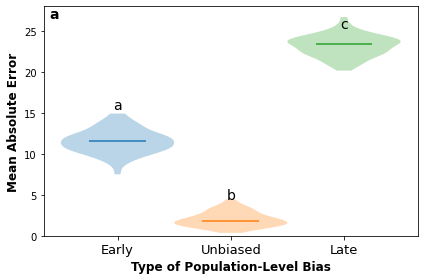

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()

labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))  
    
add_label(plt.violinplot([onset_biased['MAE_Population_mean_timing_Onset_inferred']],
               positions = [1], showmedians = True, showextrema = False, widths = 1), "Onset Biased")

add_label(plt.violinplot([unbiased['MAE_Population_mean_timing_Onset_inferred']], 
               positions = [2], showmedians = True, showextrema = False, widths = 1), 'Unbiased')

add_label(plt.violinplot([term_biased['MAE_Population_mean_timing_Onset_inferred']],
               positions = [3], showmedians = True, showextrema = False, widths = 1), "Termination Biased")


plt.ylim(0, 28)
#plt.xlim(0, 1.2)
plt.xticks(ticks=[1,2,3], labels=['Early', 'Unbiased', 'Late'], fontsize = 13)

plt.xlabel('Type of Population-Level Bias', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.text(0.4, 26.5, 'a', fontweight = 'bold', fontsize = 14)

plt.text(1, 15.5, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(2, 4.5, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(3, 25.3, 'c', fontsize = 14, horizontalalignment = 'center')
#plt.legend(*zip(*labels), loc = 4)
#plt.ticklabel_format(labelweight = 'bold')

plt.tight_layout()
plt.savefig('Figs/Bias_comps/MAE_Violin_Onset_Skew_comparison.png')    
    
plt.show()    

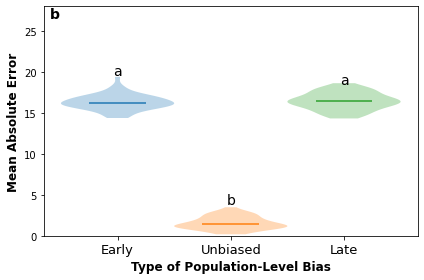

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()

labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))
    
    
add_label(plt.violinplot([onset_biased['MAE_Population_mean_timing_Median_inferred']],
               positions = [1], showmedians = True, showextrema = False, widths = 1), "Onset Biased")

add_label(plt.violinplot([unbiased['MAE_Population_mean_timing_Median_inferred']], 
               positions = [2], showmedians = True, showextrema = False, widths = 1), 'Unbiased')

add_label(plt.violinplot([term_biased['MAE_Population_mean_timing_Median_inferred']],
               positions = [3], showmedians = True, showextrema = False, widths = 1), "Termination Biased")


plt.ylim(0, 28)
#plt.xlim(0, 1.2)
plt.xticks(ticks=[1,2,3], labels=['Early', 'Unbiased', 'Late'], fontsize = 13)

plt.xlabel('Type of Population-Level Bias', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.text(0.4, 26.5, 'b', fontweight = 'bold', fontsize = 14)
plt.text(1, 19.6, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(2, 3.8, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(3, 18.5, 'a', fontsize = 14, horizontalalignment = 'center')
#plt.text(0.04, 185, 'a', fontweight = 'bold', fontsize = 14)
#plt.legend(*zip(*labels), loc = 4)
#plt.ticklabel_format(labelweight = 'bold')

plt.tight_layout()
plt.savefig('Figs/Bias_comps/MAE_Violin_Median_Skew_comparison.png')    
    
plt.show()    

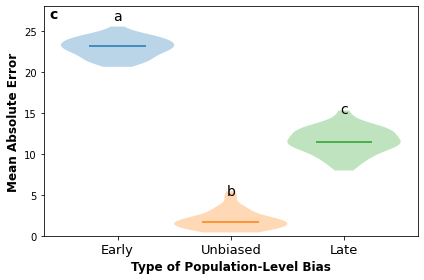

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()

labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))
    
    
add_label(plt.violinplot([onset_biased['MAE_Population_mean_timing_Termination_inferred']],
               positions = [1], showmedians = True, showextrema = False, widths = 1), "Onset Biased")

add_label(plt.violinplot([unbiased['MAE_Population_mean_timing_Termination_inferred']], 
               positions = [2], showmedians = True, showextrema = False, widths = 1), 'Unbiased')

add_label(plt.violinplot([term_biased['MAE_Population_mean_timing_Termination_inferred']],
               positions = [3], showmedians = True, showextrema = False, widths = 1), "Termination Biased")


plt.ylim(0, 28)
#plt.xlim(0, 1.2)
plt.xticks(ticks=[1,2,3], labels=['Early', 'Unbiased', 'Late'], fontsize = 13)

plt.xlabel('Type of Population-Level Bias', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.text(0.4, 26.5, 'c', fontweight = 'bold', fontsize = 14)
plt.text(1, 26.3, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(2, 5, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(3, 15, 'c', fontsize = 14, horizontalalignment = 'center')
#plt.text(0.04, 185, 'a', fontweight = 'bold', fontsize = 14)
#plt.legend(*zip(*labels), loc = 4)
#plt.ticklabel_format(labelweight = 'bold')

plt.tight_layout()
plt.savefig('Figs/Bias_comps/MAE_Violin_Onset_Termination_comparison.png') 
    
plt.show()    

In [16]:
mae_concat = pd.read_csv("Data/Simulated_Distribution_Models/Summaries/" + 'Overall_mae_multiSampleCounts.csv')

mae_concat = mae_concat[mae_concat['duration'] == 60]
mae_concat = mae_concat[mae_concat['sigma'] == 30]
mae_concat = mae_concat[mae_concat['slope'] == 4]
peak_biased = mae_concat[mae_concat['Sample_Type'] == 'normal']





FileNotFoundError: [Errno 2] No such file or directory: 'Data/Simulated_Distribution_Models/Summaries/Overall_mae_multiSampleCounts.csv'

In [ ]:
mae_concat = pd.read_csv("Data/Simulated_Distribution_Models/Summaries/RightDist_" + 'Overall_mae_multiSampleCounts.csv')
mae_concat = mae_concat[mae_concat['duration'] == 60]
mae_concat = mae_concat[mae_concat['sigma'] == 30]
mae_concat = mae_concat[mae_concat['slope'] == 4]
print(mae_concat['Sample_Type'].unique())
term_biased = mae_concat[mae_concat['Sample_Type'] == 'right_skew']


In [ ]:
mae_concat = pd.read_csv("Data/Simulated_Distribution_Models/Summaries/LeftDist_" + 'Overall_mae_multiSampleCounts.csv')
mae_concat = mae_concat[mae_concat['duration'] == 60]
mae_concat = mae_concat[mae_concat['sigma'] == 30]
mae_concat = mae_concat[mae_concat['slope'] == 4]
print(mae_concat['Sample_Type'].unique())
onset_biased = mae_concat[mae_concat['Sample_Type'] == 'left_skew']


In [17]:
mae_concat = pd.read_csv("Data/Simulated_Distribution_Models/Summaries/FlatDist_" + 'Overall_mae_multiSampleCounts.csv')
mae_concat = mae_concat[mae_concat['duration'] == 60]
mae_concat = mae_concat[mae_concat['sigma'] == 30]
mae_concat = mae_concat[mae_concat['slope'] == 4]
print(mae_concat['Sample_Type'].unique())
unbiased = mae_concat[mae_concat['Sample_Type'] == 'flat_skew']


FileNotFoundError: [Errno 2] No such file or directory: 'Data/Simulated_Distribution_Models/Summaries/FlatDist_Overall_mae_multiSampleCounts.csv'

In [ ]:


q = scipy.stats.tukey_hsd(onset_biased['MAE_Population_mean_timing_Onset_inferred'], peak_biased['MAE_Population_mean_timing_Onset_inferred'], unbiased['MAE_Population_mean_timing_Onset_inferred'], term_biased['MAE_Population_mean_timing_Onset_inferred'])
##q
print('onset')
print(q)
print()


q = scipy.stats.tukey_hsd(onset_biased['MAE_Population_mean_timing_Median_inferred'], peak_biased['MAE_Population_mean_timing_Onset_inferred'], unbiased['MAE_Population_mean_timing_Median_inferred'], term_biased['MAE_Population_mean_timing_Median_inferred'])
##q
print('median')
print(q)
print()

q = scipy.stats.tukey_hsd(onset_biased['MAE_Population_mean_timing_Termination_inferred'], peak_biased['MAE_Population_mean_timing_Onset_inferred'], unbiased['MAE_Population_mean_timing_Termination_inferred'], term_biased['MAE_Population_mean_timing_Termination_inferred'])
##q
print('Termination')
print(q)
print()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()
#plt.figure(figsize=(3, 3))
labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))  

add_label(plt.violinplot([onset_biased['MAE_Population_mean_timing_Onset_inferred']],
               positions = [1], showmedians = True, showextrema = False, widths = 1), "Onset Biased")

add_label(plt.violinplot([peak_biased['MAE_Population_mean_timing_Onset_inferred']], 
               positions = [2], showmedians = True, showextrema = False,widths = 1), 'Unbiased')

add_label(plt.violinplot([unbiased['MAE_Population_mean_timing_Onset_inferred']], 
               positions = [3], showmedians = True, showextrema = False,  widths = 1), 'Unbiased')

add_label(plt.violinplot([term_biased['MAE_Population_mean_timing_Onset_inferred']],
               positions = [4], showmedians = True, showextrema = False,  widths = 1), "Termination Biased")


plt.ylim(0, 30)
#plt.xlim(0, 1.2)
plt.xticks(ticks=[1,2,3,4], labels=['Onset', 'Peak', 'Unbiased', 'Termination'], fontsize = 13)
#plt.yticks(ticks = [0, 30])
plt.xlabel('Type of Individual Bias', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.text(0.4, 28.3, 'a', fontweight = 'bold', fontsize = 14)

plt.text(0.99, 28.2, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(2, 18.6, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(3, 22.2, 'c', fontsize = 14, horizontalalignment = 'center')
plt.text(4, 18.6, 'd', fontsize = 14, horizontalalignment = 'center')
#plt.legend(*zip(*labels), loc = 4)
#plt.ticklabel_format(labelweight = 'bold')

plt.tight_layout()
plt.savefig('Figs/Bias_comps/MAE_Violin_Onset_Individual_Skew_comparison.png')    
    
plt.show()    

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()

labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))  
    
add_label(plt.violinplot([onset_biased['MAE_Population_mean_timing_Median_inferred']],
               positions = [1], showmedians = True, showextrema = False, widths = 1), "Onset Biased")

add_label(plt.violinplot([peak_biased['MAE_Population_mean_timing_Median_inferred']], 
               positions = [2], showmedians = True, showextrema = False, widths = 1), 'Unbiased')

add_label(plt.violinplot([unbiased['MAE_Population_mean_timing_Median_inferred']], 
               positions = [3], showmedians = True, showextrema = False, widths = 1), 'Unbiased')

add_label(plt.violinplot([term_biased['MAE_Population_mean_timing_Median_inferred']],
               positions = [4], showmedians = True, showextrema = False, widths = 1), "Termination Biased")


plt.ylim(0, 30)
#plt.xlim(0, 1.2)
plt.xticks(ticks=[1,2,3,4], labels=['Onset', 'Peak', 'Unbiased', 'Termination'], fontsize = 13)

plt.xlabel('Type of Individual Bias', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.text(0.4, 28.3, 'b', fontweight = 'bold', fontsize = 14)

plt.text(1, 19.5, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(2, 10.5, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(3, 11.2, 'c', fontsize = 14, horizontalalignment = 'center')
plt.text(4, 22.9, 'a', fontsize = 14, horizontalalignment = 'center')
#plt.legend(*zip(*labels), loc = 4)
#plt.ticklabel_format(labelweight = 'bold')

plt.tight_layout()
plt.savefig('Figs/Bias_comps/MAE_Violin_Median_Individual_Skew_comparison.png')    
    
plt.show()    

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()

labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))  
    
add_label(plt.violinplot([onset_biased['MAE_Population_mean_timing_Termination_inferred']],
               positions = [1], showmedians = True, showextrema = False, widths = 1), "Onset Biased")

add_label(plt.violinplot([peak_biased['MAE_Population_mean_timing_Termination_inferred']], 
               positions = [2], showmedians = True, showextrema = False, widths = 1), 'Unbiased')

add_label(plt.violinplot([unbiased['MAE_Population_mean_timing_Termination_inferred']], 
               positions = [3], showmedians = True, showextrema = False, widths = 1), 'Unbiased')

add_label(plt.violinplot([term_biased['MAE_Population_mean_timing_Termination_inferred']],
               positions = [4], showmedians = True, showextrema = False, widths = 1), "Termination Biased")


plt.ylim(0, 30)
#plt.xlim(0, 1.2)
plt.xticks(ticks=[1,2,3,4], labels=['Onset', 'Peak', 'Unbiased', 'Termination'], fontsize = 13)

plt.xlabel('Type of Individual Bias', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.text(0.4, 28.3, 'c', fontweight = 'bold', fontsize = 14)

plt.text(1, 22.5, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(2, 17.5, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(3, 23.4, 'c', fontsize = 14, horizontalalignment = 'center')
plt.text(4, 24.7, 'd', fontsize = 14, horizontalalignment = 'center')
#plt.legend(*zip(*labels), loc = 4)
#plt.ticklabel_format(labelweight = 'bold')

plt.tight_layout()
plt.savefig('Figs/Bias_comps/MAE_Violin_Termination_Individual_Skew_comparison.png')    
    
plt.show()    

In [ ]:
############################################

In [ ]:
summary_mae = pd.read_csv("Data/Simulated_Distribution_Models/Summaries/FlatDist_" + 'Overall_mae_multiSampleCounts.csv' ) 
summary_mae.head()

short_mae = summary_mae[summary_mae['duration'] == 15]
mod_mae = summary_mae[summary_mae['duration'] == 30]
long_mae = summary_mae[summary_mae['duration'] == 60]
var_mae = summary_mae[summary_mae['duration'] == -9999]
short_mae.head()

In [ ]:
short_mae[short_mae['sigma']>= 30]['MAE_Population_mean_timing_Onset_inferred']

In [ ]:
q = scipy.stats.tukey_hsd(short_mae[short_mae['sigma']>= 10]['MAE_Population_mean_timing_Onset_inferred'], 
                short_mae[short_mae['sigma']>= 30]['MAE_Population_mean_timing_Onset_inferred'],
                mod_mae[mod_mae['sigma']>= 10]['MAE_Population_mean_timing_Onset_inferred'], 
                mod_mae[mod_mae['sigma']>= 30]['MAE_Population_mean_timing_Onset_inferred'],
                mod_mae[mod_mae['sigma']>= -999]['MAE_Population_mean_timing_Onset_inferred'],
                long_mae[long_mae['sigma']>= 10]['MAE_Population_mean_timing_Onset_inferred'], 
                long_mae[long_mae['sigma']>= 30]['MAE_Population_mean_timing_Onset_inferred'],
                var_mae['MAE_Population_mean_timing_Onset_inferred'])
print('onset')
print(q)
print()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()

labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))

    
add_label(plt.violinplot([short_mae[short_mae['sigma']>= 10]['MAE_Population_mean_timing_Onset_inferred'], 
                short_mae[short_mae['sigma']>= 30]['MAE_Population_mean_timing_Onset_inferred']],
               positions = [0.6, 1.6], showmedians = True, showextrema = False, widths = 0.3), "Short")

add_label(plt.violinplot([mod_mae[mod_mae['sigma']>= 10]['MAE_Population_mean_timing_Onset_inferred'], 
                mod_mae[mod_mae['sigma']>= 30]['MAE_Population_mean_timing_Onset_inferred'],
                mod_mae[mod_mae['sigma']>= -999]['MAE_Population_mean_timing_Onset_inferred']],
               positions = [0.8, 1.8, 2.8], showmedians = True, showextrema = False, widths = 0.3), 'Moderate')

add_label(plt.violinplot([long_mae[long_mae['sigma']>= 10]['MAE_Population_mean_timing_Onset_inferred'], 
                long_mae[long_mae['sigma']>= 30]['MAE_Population_mean_timing_Onset_inferred']],
               positions = [1, 2], showmedians = True, showextrema = False, widths = 0.3), "Long")

add_label(plt.violinplot([var_mae['MAE_Population_mean_timing_Onset_inferred']], 
               positions = [2.2], showmedians = True, showextrema = False, widths = 0.3), 'Variable')


#plt.plot(median_data['Median Observed Threshold'], median_data['Weibull Median R2 Onset'], color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'Weibull')
#plt.plot(median_data['Median Observed Threshold'], median_data['GAM Median R2 Onset'], color = 'green', linestyle = 'dashed', linewidth = 2, label = 'GAM')
#plt.plot(median_data['Median Observed Threshold'], median_data['Linear Median R2 Onset'], color = 'orange', linestyle = 'dashed', linewidth = 2, label = 'Linear')
#plt.plot(median_data['Median Observed Threshold'], median_data['Quantile Regression Median R2 Onset'], color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Quantile')
plt.text(0.4, 30.3, 'a', fontweight = 'bold', fontsize = 14)

plt.text(0.6, 13, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(1.6, 13, 'c', fontsize = 14, horizontalalignment = 'center')
plt.text(0.8, 16.1, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(1.79, 16, 'd', fontsize = 14, horizontalalignment = 'center')
plt.text(2.8, 16, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(1, 25, 'e', fontsize = 14, horizontalalignment = 'center')
plt.text(2, 25, 'f', fontsize = 14, horizontalalignment = 'center')

plt.text(2.19, 18, 'g', fontsize = 14, horizontalalignment = 'center')

plt.ylim(0, 32.5)
plt.xticks([0.8, 1.9,2.8], labels = ['Low', 'High', 'Variable'], weight = 'bold')
#plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9])
plt.xlabel('Magnitude of\nIntrapopulation Variation', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.legend(title = "Duration", *zip(*labels), loc = 1)
    
plt.tight_layout()
plt.savefig('Figs/MAE_Violin_Multicomp_onset_tukeys.png')    
    
plt.show()    

In [ ]:
q = scipy.stats.tukey_hsd(short_mae[short_mae['sigma']>= 10]['MAE_Population_mean_timing_Median_inferred'], 
                short_mae[short_mae['sigma']>= 30]['MAE_Population_mean_timing_Median_inferred'],
                mod_mae[mod_mae['sigma']>= 10]['MAE_Population_mean_timing_Median_inferred'], 
                mod_mae[mod_mae['sigma']>= 30]['MAE_Population_mean_timing_Median_inferred'],
                mod_mae[mod_mae['sigma']>= -999]['MAE_Population_mean_timing_Median_inferred'],
                long_mae[long_mae['sigma']>= 10]['MAE_Population_mean_timing_Median_inferred'], 
                long_mae[long_mae['sigma']>= 30]['MAE_Population_mean_timing_Median_inferred'],
                var_mae['MAE_Population_mean_timing_Median_inferred'])
print('onset')
print(q)
print()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()

labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))

    
add_label(plt.violinplot([short_mae[short_mae['sigma']>= 10]['MAE_Population_mean_timing_Median_inferred'], 
                short_mae[short_mae['sigma']>= 30]['MAE_Population_mean_timing_Median_inferred']],
               positions = [0.6, 1.6], showmedians = True, showextrema = False, widths = 0.3), "Short")

add_label(plt.violinplot([mod_mae[mod_mae['sigma']>= 10]['MAE_Population_mean_timing_Median_inferred'], 
                mod_mae[mod_mae['sigma']>= 30]['MAE_Population_mean_timing_Median_inferred'],
                mod_mae[mod_mae['sigma']>= -999]['MAE_Population_mean_timing_Median_inferred']],
               positions = [0.8, 1.8, 2.8], showmedians = True, showextrema = False, widths = 0.3), 'Moderate')

add_label(plt.violinplot([long_mae[long_mae['sigma']>= 10]['MAE_Population_mean_timing_Median_inferred'], 
                long_mae[long_mae['sigma']>= 30]['MAE_Population_mean_timing_Median_inferred']],
               positions = [1, 2], showmedians = True, showextrema = False, widths = 0.3), "Long")

add_label(plt.violinplot([var_mae['MAE_Population_mean_timing_Median_inferred']], 
               positions = [2.2], showmedians = True, showextrema = False, widths = 0.3), 'Variable')


#plt.plot(median_data['Median Observed Threshold'], median_data['Weibull Median R2 Onset'], color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'Weibull')
#plt.plot(median_data['Median Observed Threshold'], median_data['GAM Median R2 Onset'], color = 'green', linestyle = 'dashed', linewidth = 2, label = 'GAM')
#plt.plot(median_data['Median Observed Threshold'], median_data['Linear Median R2 Onset'], color = 'orange', linestyle = 'dashed', linewidth = 2, label = 'Linear')
#plt.plot(median_data['Median Observed Threshold'], median_data['Quantile Regression Median R2 Onset'], color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Quantile')
plt.text(0.4, 30.3, 'b', fontweight = 'bold', fontsize = 14)

plt.text(0.59, 11, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(1.6, 11, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(0.8, 11.3, 'c', fontsize = 14, horizontalalignment = 'center')
plt.text(1.79, 11.3, 'd', fontsize = 14, horizontalalignment = 'center')
plt.text(2.79, 11.4, 'e', fontsize = 14, horizontalalignment = 'center')
plt.text(1, 12, 'bd', fontsize = 14, horizontalalignment = 'center')

plt.text(2, 12, 'f', fontsize = 14, horizontalalignment = 'center')
plt.text(2.19, 18, 'g', fontsize = 14, horizontalalignment = 'center')

plt.ylim(0, 32.5)
plt.xticks([0.8, 1.9,2.8], labels = ['Low', 'High', 'Variable'], weight = 'bold')
#plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9])
plt.xlabel('Magnitude of\nIntrapopulation Variation', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.legend(title = "Duration", *zip(*labels), loc = 1)
    
plt.tight_layout()
plt.savefig('Figs/MAE_Violin_Multicomp_median_tukeys.png')    
    
plt.show()    

In [ ]:
q = scipy.stats.tukey_hsd(short_mae[short_mae['sigma']>= 10]['MAE_Population_mean_timing_Termination_inferred'], 
                short_mae[short_mae['sigma']>= 30]['MAE_Population_mean_timing_Termination_inferred'],
                mod_mae[mod_mae['sigma']>= 10]['MAE_Population_mean_timing_Termination_inferred'], 
                mod_mae[mod_mae['sigma']>= 30]['MAE_Population_mean_timing_Termination_inferred'],
                mod_mae[mod_mae['sigma']>= -999]['MAE_Population_mean_timing_Termination_inferred'],
                long_mae[long_mae['sigma']>= 10]['MAE_Population_mean_timing_Termination_inferred'], 
                long_mae[long_mae['sigma']>= 30]['MAE_Population_mean_timing_Termination_inferred'],
                var_mae['MAE_Population_mean_timing_Termination_inferred'])
print('onset')
print(q)
print()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()

labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))

    
add_label(plt.violinplot([short_mae[short_mae['sigma']>= 10]['MAE_Population_mean_timing_Termination_inferred'], 
                short_mae[short_mae['sigma']>= 30]['MAE_Population_mean_timing_Termination_inferred']],
               positions = [0.6, 1.6], showmedians = True, showextrema = False, widths = 0.3), "Short")

add_label(plt.violinplot([mod_mae[mod_mae['sigma']>= 10]['MAE_Population_mean_timing_Termination_inferred'], 
                mod_mae[mod_mae['sigma']>= 30]['MAE_Population_mean_timing_Termination_inferred'],
                mod_mae[mod_mae['sigma']>= -999]['MAE_Population_mean_timing_Termination_inferred']],
               positions = [0.8, 1.8, 2.8], showmedians = True, showextrema = False, widths = 0.3), 'Moderate')

add_label(plt.violinplot([long_mae[long_mae['sigma']>= 10]['MAE_Population_mean_timing_Termination_inferred'], 
                long_mae[long_mae['sigma']>= 30]['MAE_Population_mean_timing_Termination_inferred']],
               positions = [1, 2], showmedians = True, showextrema = False, widths = 0.3), "Long")

add_label(plt.violinplot([var_mae['MAE_Population_mean_timing_Termination_inferred']], 
               positions = [2.2], showmedians = True, showextrema = False, widths = 0.3), 'Variable')


#plt.plot(median_data['Median Observed Threshold'], median_data['Weibull Median R2 Onset'], color = 'blue', linestyle = 'dashed', linewidth = 2, label = 'Weibull')
#plt.plot(median_data['Median Observed Threshold'], median_data['GAM Median R2 Onset'], color = 'green', linestyle = 'dashed', linewidth = 2, label = 'GAM')
#plt.plot(median_data['Median Observed Threshold'], median_data['Linear Median R2 Onset'], color = 'orange', linestyle = 'dashed', linewidth = 2, label = 'Linear')
#plt.plot(median_data['Median Observed Threshold'], median_data['Quantile Regression Median R2 Onset'], color = 'red', linestyle = 'dashed', linewidth = 2, label = 'Quantile')
plt.text(0.4, 30.3, 'c', fontweight = 'bold', fontsize = 14)

plt.text(0.59, 15.4, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(1.6, 15.4, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(0.8, 18.7, 'c', fontsize = 14, horizontalalignment = 'center')
plt.text(1.79, 18.8, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(2.79, 17, 'c', fontsize = 14, horizontalalignment = 'center')
plt.text(1, 23.4, 'e', fontsize = 14, horizontalalignment = 'center')
plt.text(2, 23.4, 'f', fontsize = 14, horizontalalignment = 'center')
plt.text(2.19, 19.2, 'g', fontsize = 14, horizontalalignment = 'center')

plt.ylim(0, 32.5)
plt.xticks([0.8, 1.9,2.8], labels = ['Low', 'High', 'Variable'], weight = 'bold')
#plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9])
plt.xlabel('Magnitude of\nIntrapopulation Variation', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.legend(title = "Duration", *zip(*labels), loc = 1)
    
plt.tight_layout()
plt.savefig('Figs/MAE_Violin_Multicomp_termination_tukeys.png')    
    
plt.show()    

In [ ]:
###########mild pop skew

In [ ]:
model_dict = {'indiv_timing': [['Data\Simulated_Distribution_Models/RQ_SimHerb_1000_Simulated_Distribution_Slope4_30sigma_normal_skew_test21_RQ_Predict_Test_simData_Simulated_Distribution_SlopeComp_Local_sample.csv',
                               ],
                               'RQ_Pred_YYY_Local_sample', ['0.1', '0.5', '0.9'], 
                               ['Local_indiv_onset_DOY', 'Local_indiv_mean_DOY', 'Local_indiv_termination_DOY']],
             'Population_mean_timing': [['Data\Simulated_Distribution_Models/RQ_SimHerb_1000_Simulated_Distribution_Slope4_30sigma_normal_skew_test21_RQ_Predict_Test_simData_Simulated_Distribution_SlopeComp_Local_sample.csv',
                              ],
                               'RQ_Pred_YYY_Local_sample', ['0.1', '0.5', '0.9'],
                               ['Local_10pct_mean_DOY', 'Local_50pct_mean_DOY', 'Local_90pct_mean_DOY']],
            'Population_timing': [['Data\Simulated_Distribution_Models/RQ_SimHerb_1000_Simulated_Distribution_Slope4_30sigma_normal_skew_test21_RQ_Predict_Test_simData_Simulated_Distribution_SlopeComp_Local_sample.csv',
                              ],
                              'RQ_Pred_YYY_Local_sample', ['0.1', '0.5', '0.9'],         
                              ['Local_10pct_onset_DOY', 'Local_50pct_mean_DOY', 'Local_90pct_termination_DOY']]}

summary_list1 = Onset_termination_eval(out_path = "Data/Simulated_Distribution_Models/Summaries/normDist_Skew_test21_", 
                                      model_dict = model_dict,
                                     sample_counts = [1000], sample_type = 'normal_skew')



In [ ]:
mae_concat = pd.read_csv("Data/Simulated_Distribution_Models/Summaries/normDist_Skew_test21_" + 'Overall_mae_multiSampleCounts.csv')
mae_concat.head()

In [ ]:
unbiased = mae_concat[mae_concat['skew'] == 0]
onset_biased = mae_concat[mae_concat['skew'] == -0.25]
term_biased = mae_concat[mae_concat['skew'] == 0.25]

q = scipy.stats.tukey_hsd(onset_biased['MAE_Population_mean_timing_Onset_inferred'],unbiased['MAE_Population_mean_timing_Onset_inferred'], term_biased['MAE_Population_mean_timing_Onset_inferred'])
##q
print('onset')
print(q)
print()


q = scipy.stats.tukey_hsd(onset_biased['MAE_Population_mean_timing_Median_inferred'], unbiased['MAE_Population_mean_timing_Median_inferred'], term_biased['MAE_Population_mean_timing_Median_inferred'])
##q
print('median')
print(q)
print()

q = scipy.stats.tukey_hsd(onset_biased['MAE_Population_mean_timing_Termination_inferred'], unbiased['MAE_Population_mean_timing_Termination_inferred'], term_biased['MAE_Population_mean_timing_Termination_inferred'])
##q
print('Termination')
print(q)
print()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()

labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))  
    
add_label(plt.violinplot([onset_biased['MAE_Population_mean_timing_Onset_inferred']],
               positions = [1], showmedians = True, showextrema = False, widths = 1), "Onset Biased")

add_label(plt.violinplot([unbiased['MAE_Population_mean_timing_Onset_inferred']], 
               positions = [2], showmedians = True, showextrema = False, widths = 1), 'Unbiased')

add_label(plt.violinplot([term_biased['MAE_Population_mean_timing_Onset_inferred']],
               positions = [3], showmedians = True, showextrema = False, widths = 1), "Termination Biased")


plt.ylim(0, 28)
#plt.xlim(0, 1.2)
plt.xticks(ticks=[1,2,3], labels=['Early', 'Unbiased', 'Late'], fontsize = 13)

plt.xlabel('Type of Population-Level Bias', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.text(0.4, 26.5, 'a', fontweight = 'bold', fontsize = 14)

plt.text(0.99, 11.5, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(2, 5.6, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(2.99, 11.1, 'a', fontsize = 14, horizontalalignment = 'center')
#plt.legend(*zip(*labels), loc = 4)
#plt.ticklabel_format(labelweight = 'bold')

plt.tight_layout()
plt.savefig('Figs/Bias_comps/MAE_Violin_Onset_Skew_comparison_mild.png')    
    
plt.show()    

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()

labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))
    
    
add_label(plt.violinplot([onset_biased['MAE_Population_mean_timing_Median_inferred']],
               positions = [1], showmedians = True, showextrema = False, widths = 1), "Onset Biased")

add_label(plt.violinplot([unbiased['MAE_Population_mean_timing_Median_inferred']], 
               positions = [2], showmedians = True, showextrema = False, widths = 1), 'Unbiased')

add_label(plt.violinplot([term_biased['MAE_Population_mean_timing_Median_inferred']],
               positions = [3], showmedians = True, showextrema = False, widths = 1), "Termination Biased")


plt.ylim(0, 28)
#plt.xlim(0, 1.2)
plt.xticks(ticks=[1,2,3], labels=['Early', 'Unbiased', 'Late'], fontsize = 13)

plt.xlabel('Type of Population-Level Bias', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.text(0.4, 26.5, 'b', fontweight = 'bold', fontsize = 14)

plt.text(1,8, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(2, 3.8, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(2.99, 10.5, 'a', fontsize = 14, horizontalalignment = 'center')
#plt.text(0.04, 185, 'a', fontweight = 'bold', fontsize = 14)
#plt.legend(*zip(*labels), loc = 4)
#plt.ticklabel_format(labelweight = 'bold')

plt.tight_layout()
plt.savefig('Figs/Bias_comps/MAE_Violin_Median_Skew_comparison_mild.png')    
    
plt.show()    

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

plt.clf()

labels = []
def add_label(violin, label):
    color = violin['bodies'][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color = color), label))
    
    
add_label(plt.violinplot([onset_biased['MAE_Population_mean_timing_Termination_inferred']],
               positions = [1], showmedians = True, showextrema = False, widths = 1), "Onset Biased")

add_label(plt.violinplot([unbiased['MAE_Population_mean_timing_Termination_inferred']], 
               positions = [2], showmedians = True, showextrema = False, widths = 1), 'Unbiased')

add_label(plt.violinplot([term_biased['MAE_Population_mean_timing_Termination_inferred']],
               positions = [3], showmedians = True, showextrema = False, widths = 1), "Termination Biased")


plt.ylim(0, 28)
#plt.xlim(0, 1.2)
plt.xticks(ticks=[1,2,3], labels=['Early', 'Unbiased', 'Late'], fontsize = 13)

plt.xlabel('Type of Population-Level Bias', size = 12, weight = 'bold')
plt.ylabel('Mean Absolute Error', size = 12, weight = 'bold')
plt.text(0.4, 26.5, 'c', fontweight = 'bold', fontsize = 14)

plt.text(1, 10.3, 'a', fontsize = 14, horizontalalignment = 'center')
plt.text(2, 4.8, 'b', fontsize = 14, horizontalalignment = 'center')
plt.text(2.99, 9.6, 'c', fontsize = 14, horizontalalignment = 'center')
#plt.text(0.04, 185, 'a', fontweight = 'bold', fontsize = 14)
#plt.legend(*zip(*labels), loc = 4)
#plt.ticklabel_format(labelweight = 'bold')

plt.tight_layout()
plt.savefig('Figs/Bias_comps/MAE_Violin_Onset_Termination_comparison_mild.png') 
    
plt.show()    